<img src="https://ecogenomics.github.io/CheckM/img/checkm.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Elizalde Granda, Jennyffer Elizalde** 

**03-08-2022**

<font color='red'>Color de texto</font>


### REQUERIMIENTOS PARA EL EXAMEN

Utilice de preferencia ```Jupyter``` de Anaconda, dado que tienen que hacer un control de cambios en cada pregunta. 

Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2022I_GBI6_ExamenPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 0 [0.5 puntos]
Realice cambios al cuaderno de jupyter: 
<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=400 height=300 />
**Nombre:** Jennyffer Elizalde

**Carrera:** Biotecnología

**Provincia:** Loja

**Etnia:** Mestiza

- Escriba una **tabla** con las características de su computador 


In [8]:
import pandas as pd

In [9]:
Datos_c = pd.DataFrame({"Procesador" : (["Intel(R)", "core(TM)", " 2.80 GHz"]),
                    "RAM instalada" : ["8.00 GB", None, None],
                    "Tipo de sistema" : ["64 bits", None, None]})
Datos_c

,Procesador,RAM instalada,Tipo de sistema
0,Intel(R),8.00 GB,64 bits
1,core(TM),None,None
2,2.80 GHz,None,None


## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dos funciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```science_plots```: la función debe 

- utilizar como argumento de entrada la data descargada por ```download_pubmed```
- ordenar los conteos de autores por país en orden ascedente y 
- seleccionar los cinco más abundantes. Con esta selección debe graficar un ```pie_plot```. Como guía para el conteo por países puede usar el ejemplo de [MapOfScience](https://github.com/CSB-book/CSB/blob/master/regex/solutions/MapOfScience_solution.ipynb). 

iii *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e **imprima docstring de cada función**.


In [1]:
import miningscience_g01 as msc

In [2]:
help (msc.download_pubmed)
help (msc.science_plots)

Help on function download_pubmed in module miningscience_g01:

download_pubmed(keyword)
    Esta función permite la búesqueda científica en la base de datos Pubmed

Help on function science_plots in module miningscience_g01:

science_plots(archivo)
    Esta función permite ordenar ascendentemente el número de autores que realizaron un estudio científico de acuerdo a la búsqueda en la función 1 y seleccionar los 5 más abundantes




## Ejercicio 2 [2 puntos]


Utilice dos veces la función ```download_pubmed``` para: 

- Descargar la data, utilizando los keyword de su preferencia. 
- Guardar el archivo descargado en la carpeta ```data```.

Para cada corrida, imprima lo siguiente: 

```python
'El número artículos para KEYWORD es: XX' # Que se cargue con inserción de texto o valor que correspondea KEYWORD y XX
```

In [3]:
import os
import re
x = msc.download_pubmed("Dogs")
y = len (x)
print ('El número artículos para KEYWORD es: ',y)
with open ("../Data/Dogs.txt","w") as txt:
    txt.write(x)

El número artículos para KEYWORD es:  2098497


In [4]:
import os
import re
j = msc.download_pubmed("virus")
k = len (j)
print ('El número artículos para KEYWORD es: ',k)
with open ("../Data/virus.txt","w") as txt:
    txt.write(j)

El número artículos para KEYWORD es:  2266271


## Ejercicio 3 [1.5 puntos]

Utilice dos veces la función ```science_plots``` para: 

- Visualizar un pie_plot para cada data descargada en el ejercicio 2.
- Guardar los pie_plot en la carpeta ```img```

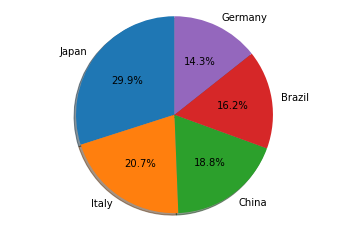

In [5]:
Dogs = msc.science_plots (x)
with open ("../img/Dogs.jpg","w") as jpg:
    Dogs

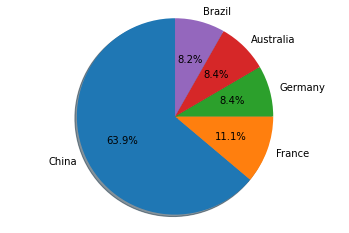

In [6]:
Virus = msc.science_plots (j)
with open ("../img/Virus.jpg","w") as jpg:
    Virus


## Ejercicio 4 [1 punto]

**Interprete** los resultados de las figuras del **ejercicio 3**

*Escriba la respuesta del ejercicio 5*

Los cinco países en los que se cuenta con más autores que hayan realizado investigaciones con la keyword "Dogs" son Japón, Italia, China, Brazil y Alemania

Los cinco países en los que se cuenta con más autores que hayan realizado investigaciones con la keyword "Virus" son China, Francia, Alemania, Australia y brazil

## Ejercicio 5 [2 puntos]

Para algún **gen de las enzimas que intervienen en la ruta metabolica de la gluconeogenesis** ([Lista de genes por tipología](https://www.genome.jp/pathway/map00010+C00068)), realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda y guarde en la carpeta ```data```.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de las secuencias de los **quince primeros** IDs de la accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Guarde su arbol filogénetico en la carpeta ```img```

5. Interprete el árbol del paso 4. 

https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=nucleotide&rettype=gb&retmode=text&id=XM_029014683.1%2CXM_039427779.1%2CXM_024718519.1%2CXM_040253125.1%2CXM_011526754.4%2CXM_016933995.2%2CNM_001289789.1%2CXM_016933996.2%2CXM_024351021.1%2CNM_001184722.1%2CNM_001329909.1%2CXM_024351019.1%2CNM_001329910.1%2CXM_024351020.1%2CNM_000175.5&tool=biopython&email=A.N.Other%40example.com
"C:\Program Files (x86)\ClustalW2\clustalw2.exe" -infile=../data/sequence.fasta


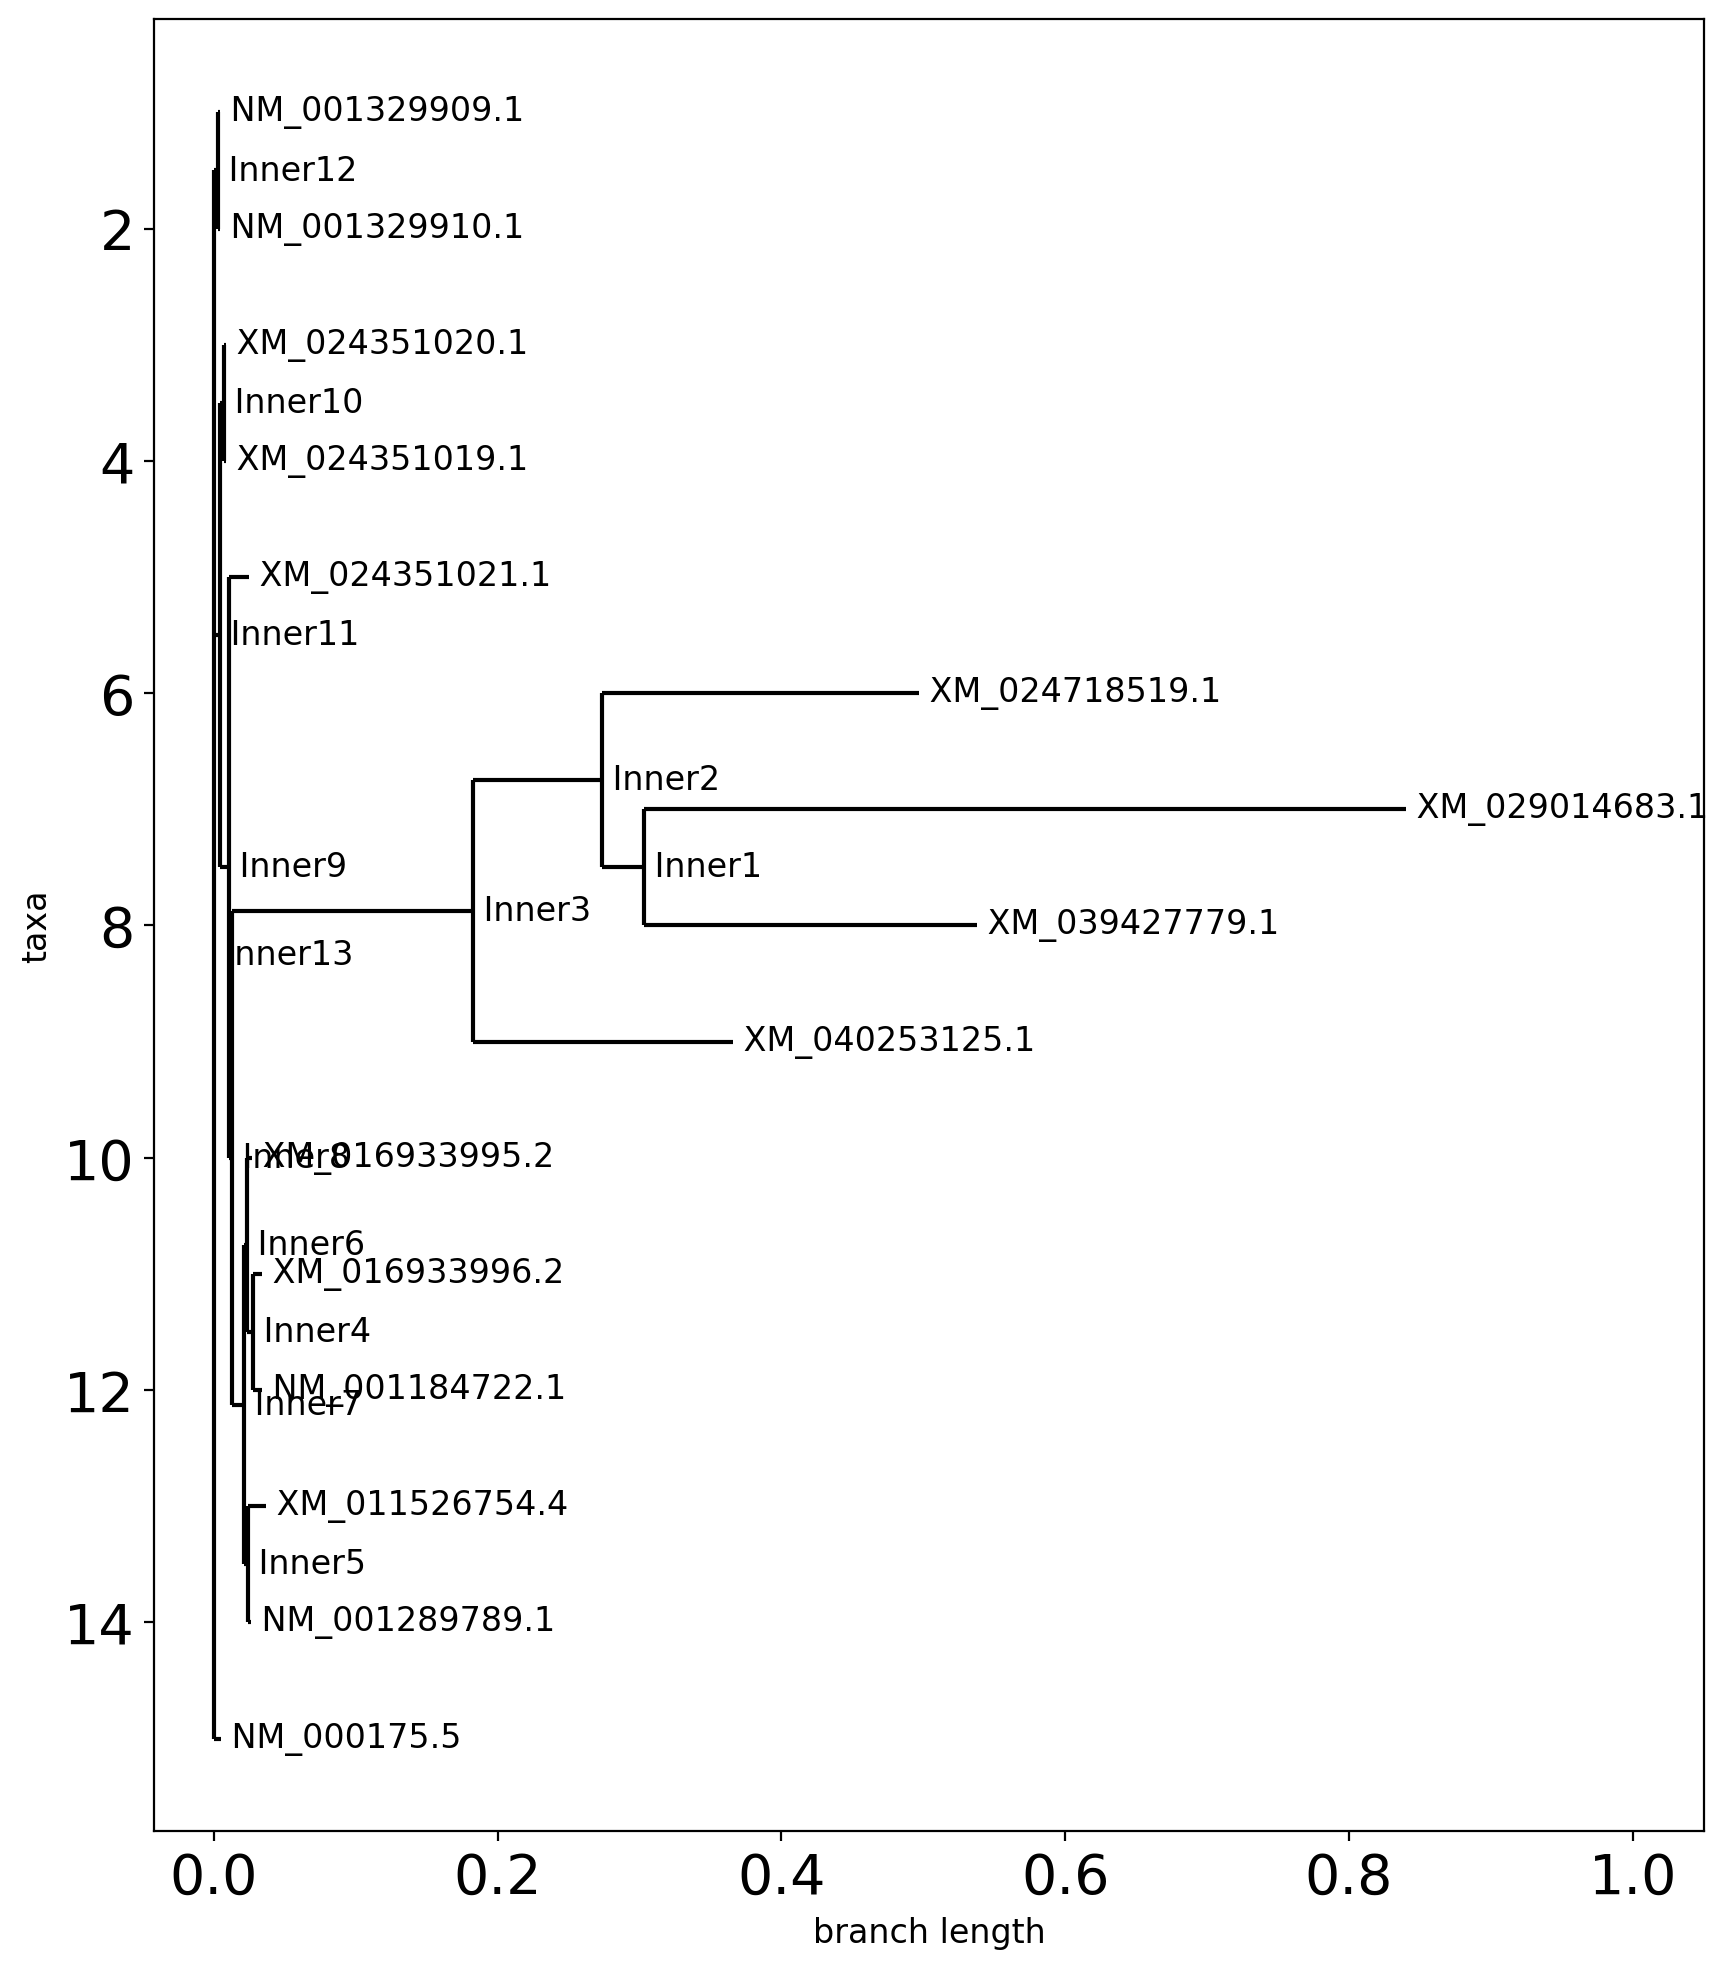

In [7]:
from Bio import Entrez
from Bio import Phylo
import matplotlib.pyplot as plt
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import SeqIO
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Align.Applications import ClustalwCommandline
from Bio import AlignIO
import os

with open("../data/sequence.seq") as file:
    text = file.read()
text = text.split('\n')
text = ','.join(text[:15])

handle = Entrez.efetch( db="nucleotide", rettype="gb", retmode="text", id = text)
print(handle.url)
records = SeqIO.parse("../data/sequence.gb", "genbank") 
count = SeqIO.write(records, "../data/sequence.fasta", "fasta") 

clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "../data/sequence.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)

ClustalAlign = AlignIO.read("../data/sequence.aln", "clustal")

with open("../data/sequence.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
    
calculator = DistanceCalculator("identity")
distance_matrix = calculator.get_distance(alignment)

constructor = DistanceTreeConstructor(calculator)
tree = constructor.build_tree(alignment)
tree.rooted = True
fig = plt.figure(figsize=(10, 12), dpi=200)  
plt.rc('font', size=12)              
plt.rc('xtick', labelsize=20)       
plt.rc('ytick', labelsize=20)      
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, axes=axes)
fig.savefig("../img/arbolfilogenético.jpg")

Descripción: Inner 1 es antecesor de XM_029014683.1 y XM_039427779.1, Inner2 es antecesor de Iner1 y XM_024718519.1, Inner 3 es antecesor de iner 2 y XM_040253125.1.

**Escriba aquí la interpretación del árbol**

## Ejercicio 6 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente:
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada
- Un diagrama de procesos del módulo ```miningscience```
3. Asegurarse que su repositorio tiene las carpetas ```data``` e ```img``` con los archivos que ha ido guardando en las preguntas anteriores.  
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 5), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado el ejercicio 1  
```
```sh 
Carlitos Alimaña ha realizado el ejercicio 2
```
```sh 
...
```
